In [11]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from tqdm import tqdm

In [16]:
neg = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5000_test_negative7.zarr')
neg = neg.compute()

In [3]:
pos = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5000_test_positive7.zarr')
pos = pos.compute()

In [4]:
nodiif = xr.open_zarr('/storage/shared/oceanparcels/output_data/data_Claudio/tests/HC13_5000_65_noKz2.zarr')
nodiff = nodiif.compute()

Text(0, 0.5, 'Depth [m]')

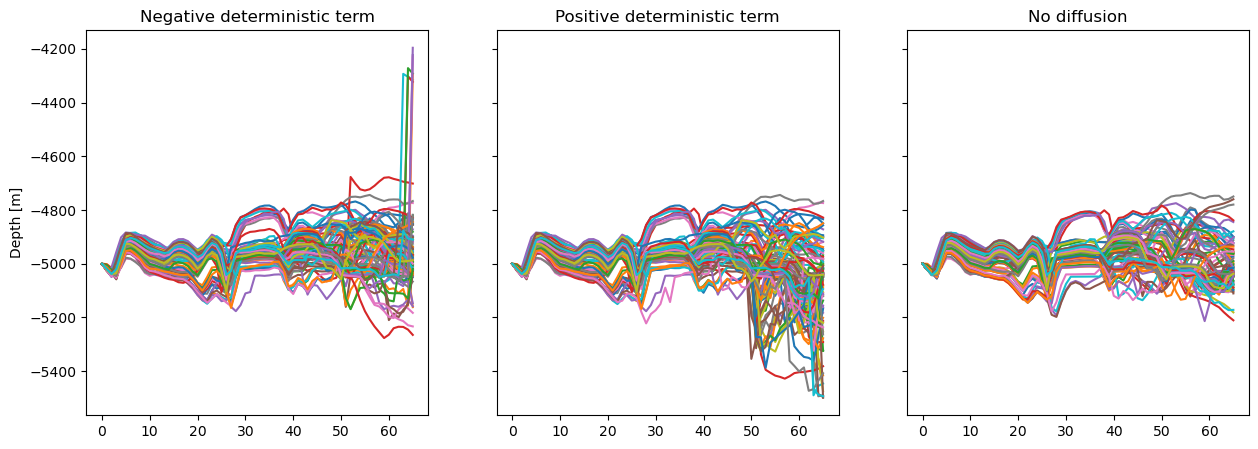

In [5]:
# make a plot with three subplots in one figure with shared yaxis
fig, axes = plt.subplots(ncols=3, nrows=1, sharey=True, figsize=(15, 5))

for i in range(100):
    axes[0].plot(-neg['z'][i,:])
    axes[1].plot(-pos['z'][i,:])
    axes[2].plot(-nodiff['z'][i,:])
    
axes[0].set_title('Negative deterministic term')
axes[1].set_title('Positive deterministic term')
axes[2].set_title('No diffusion')

axes[0].set_ylabel('Depth [m]')

Text(0, 0.5, 'Diffusive mean depth displacement [m]')

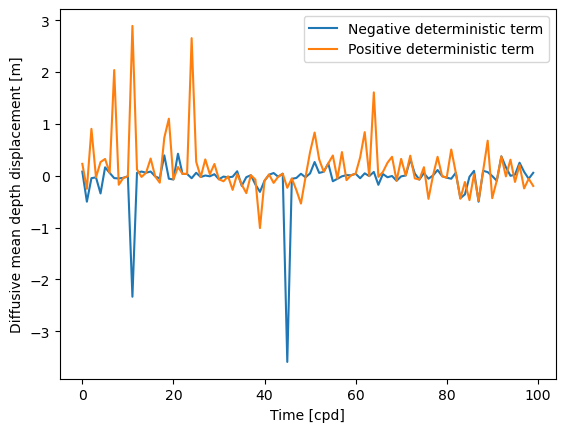

In [7]:
neg['z_kz'].mean(dim='obs').plot(label='Negative deterministic term')
pos['z_kz'].mean(dim='obs').plot(label='Positive deterministic term')
plt.legend()
plt.xlabel('Time [cpd]')
plt.ylabel('Diffusive mean depth displacement [m]')

Text(0, 0.5, 'STD depth depth displacement [m]')

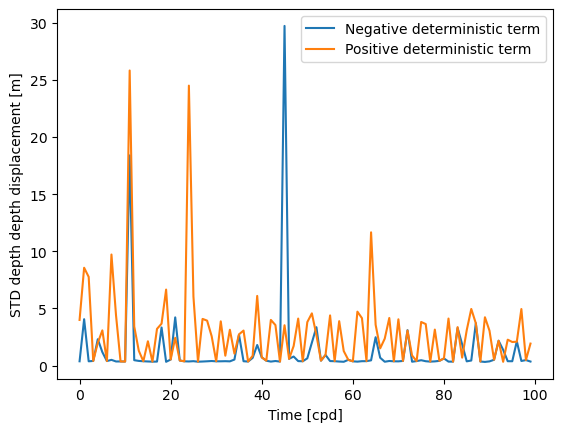

In [8]:
neg['z_kz'].std(dim='obs').plot(label='Negative deterministic term')
pos['z_kz'].std(dim='obs').plot(label='Positive deterministic term')
plt.legend()
plt.xlabel('Time [cpd]')
plt.ylabel('STD depth depth displacement [m]')

[]

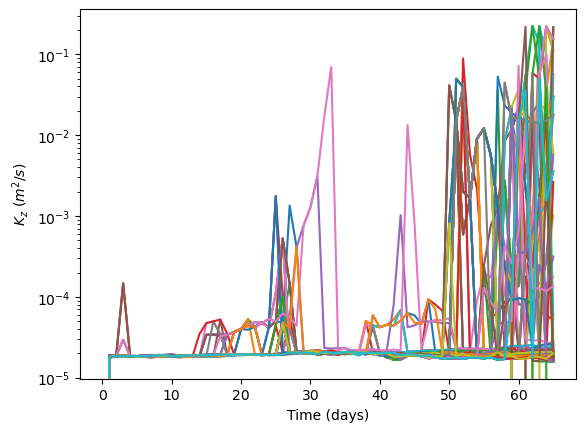

In [9]:
for i in range(100):
    # plt.plot(neg['z_kz'][i,:])
    plt.plot(pos['kz'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('$K_z$ ($m^2/s$)')

plt.semilogy()


Text(0, 0.5, 'Depth (m)')

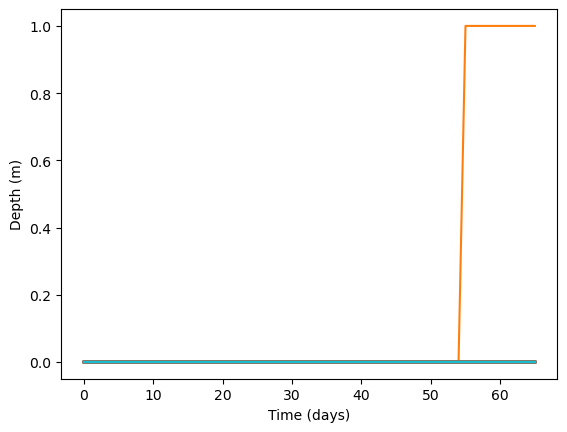

In [10]:
for i in range(100):
    # plt.plot(neg['z_kz'][i,:])
    plt.plot(nodiff['floored'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')


Text(0, 0.5, 'Latitude')

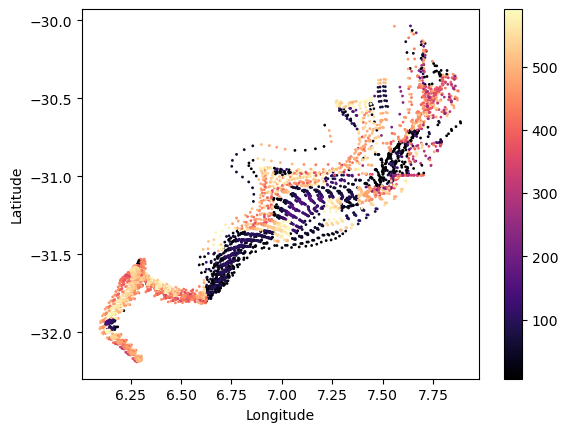

In [17]:
for i in range(100):
    # plt.plot(neg['z_kz'][i,:])
    im = plt.scatter(pos['lon'][i,:], pos['lat'][i,:], 
                     c=pos['bottom'][i,:] - pos['z'][i,:], cmap='magma',
                     s=1)
    
plt.colorbar(im)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

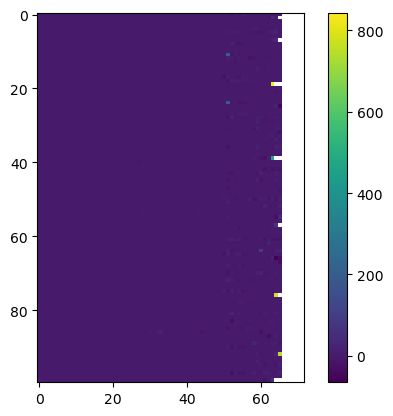

In [10]:
plt.imshow(pos['z_kz'])
plt.colorbar()

Text(0.5, 1.0, 'Difference between bottom depth and particle depth')

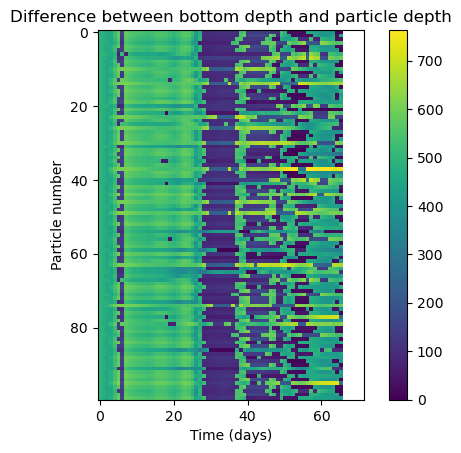

In [80]:
plt.imshow(nodiff['bottom'] - nodiff['z'])
plt.colorbar()
plt.xlabel('Time (days)')
plt.ylabel('Particle number')
plt.title('Difference between bottom depth and particle depth')

Text(0.5, 1.0, 'Difference between bottom depth and particle depth')

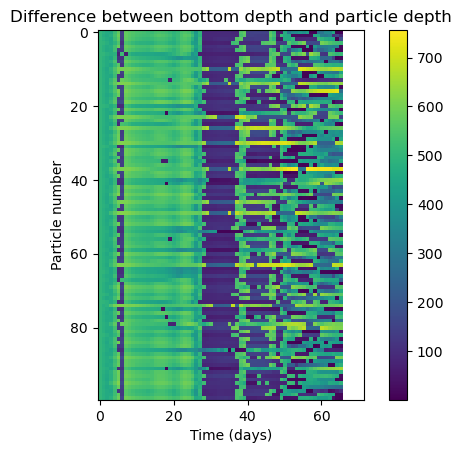

In [79]:
plt.imshow(pos['bottom']-pos['z'])
plt.colorbar()
plt.xlabel('Time (days)')
plt.ylabel('Particle number')
plt.title('Difference between bottom depth and particle depth')

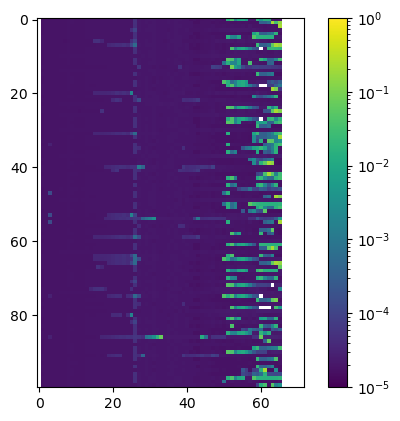

In [78]:
from matplotlib.colors import LogNorm 
plt.imshow(pos['kz'], norm=LogNorm(vmin=1e-5, vmax=1e0))
plt.colorbar()

In [14]:
max_z_index = np.zeros_like(pos.obs.values)

for j in pos.obs.values:
    max_z_index[j] = np.argmax(pos['z_kz'][:, j].values, axis=0)

In [28]:
max_z_index[60:]

array([64, 52, 62, 19, 19,  1,  0,  0,  0,  0,  0,  0], dtype=int32)

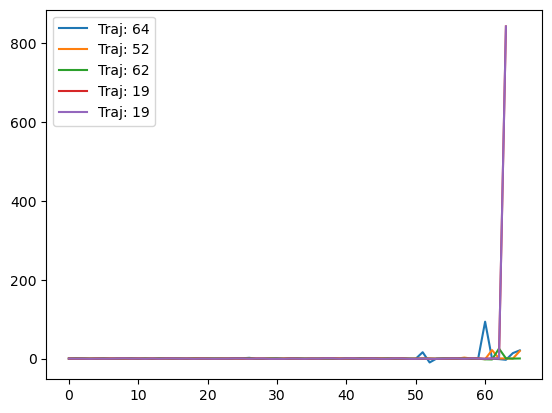

In [32]:
for traj in max_z_index[60:65]:
    plt.plot(pos['z_kz'][traj, :].values, label= 'Traj: ' + str(traj))
    
plt.legend()  

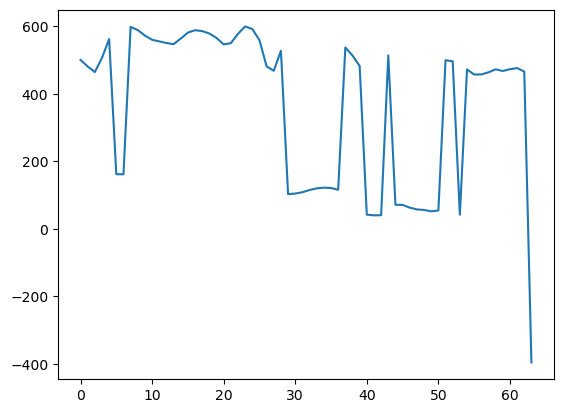

In [38]:
plt.plot(pos['bottom'][19, :] - pos['z'][19, :])

[]

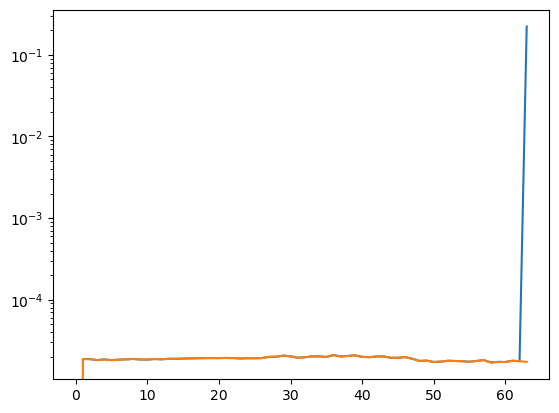

In [36]:
plt.plot(pos['kz'][19, :])
plt.plot(pos['kzdz'][19, :])

plt.semilogy()

Text(0.5, 1.0, 'Negative sign in deterministic term diffusion')

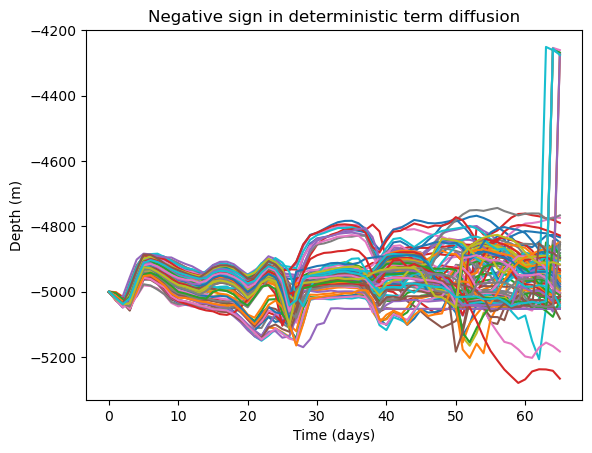

In [17]:
for i in range(100):
    plt.plot(-neg['z'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')
plt.title('Negative sign in deterministic term diffusion')

In [ ]:
for i in range(100):
    plt.plot(-neg['z'][i,:])
    
plt.xlabel('Time (days)')
plt.ylabel('Depth (m)')
plt.title('Negative sign in deterministic term diffusion')